In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
# Load the training data
train_data = pd.read_csv("TrainData.csv")

In [3]:
# Separate features (X) and labels (y)
X_train = train_data.iloc[:, :-1]  # Features
y_train = train_data.iloc[:, -1]   # Labels


In [4]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [5]:
# Initialize PCA and fit it to the scaled data
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)

# Print the number of components required to retain 95% of the variance
print("Number of components to retain 95% variance:", pca.n_components_)

# Optional: If you want to see the explained variance ratio of each component
print("Explained variance ratio of each component:", pca.explained_variance_ratio_)

Number of components to retain 95% variance: 112
Explained variance ratio of each component: [0.15871387 0.13221568 0.08393295 0.05869179 0.05175319 0.03154792
 0.02700036 0.02414105 0.02296171 0.01880846 0.01652314 0.01355869
 0.01295999 0.01220259 0.01077938 0.01037568 0.00981178 0.00901887
 0.00848091 0.00819032 0.00758642 0.00707182 0.006684   0.00629952
 0.00591481 0.00573664 0.00561963 0.00547673 0.00523302 0.00504779
 0.00473741 0.00462557 0.00446289 0.00439235 0.00419822 0.004138
 0.00399752 0.00384418 0.00371883 0.00365258 0.00355504 0.00353155
 0.00327094 0.00313457 0.00306906 0.00296633 0.00285674 0.00280423
 0.0027563  0.00269949 0.0026228  0.00256565 0.0024686  0.00243726
 0.00239666 0.00236372 0.00226883 0.00222001 0.00217628 0.0020994
 0.00203942 0.00202444 0.00198221 0.00196724 0.0019264  0.00189123
 0.00186366 0.00182209 0.00178044 0.00177377 0.00170997 0.00170195
 0.00166758 0.00164786 0.00162391 0.00157433 0.00153827 0.00153325
 0.0015136  0.00149576 0.0014578  0.001

In [6]:
# Store the dimensionality-reduced data to a new CSV file
reduced_data = pd.DataFrame(X_train_pca)
reduced_data.to_csv("Reduced_TrainData.csv", index=False)

print("Dimensionality-reduced data stored successfully.")

Dimensionality-reduced data stored successfully.


In [7]:
# Load the test data
test_data = pd.read_csv("TestData.csv")

In [8]:
# Separate features (X_test) and labels (y_test)
X_test = test_data.iloc[:, :-1]  # Features
y_test = test_data.iloc[:, -1]   # Labels


In [9]:
# Standardize the features
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

In [10]:
# Apply PCA using the same number of components as determined for the training data
X_test_pca = pca.transform(X_test_scaled)

In [11]:
# Store the dimensionality-reduced test data to a new CSV file
reduced_test_data = pd.DataFrame(X_test_pca)
reduced_test_data.to_csv("Reduced_TestData.csv", index=False)

print("Dimensionality-reduced test data stored successfully.")

Dimensionality-reduced test data stored successfully.


In [20]:
import numpy as np

In [21]:
class GaussianNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.parameters = []
        for c in self.classes:
            X_c = X[y == c]
            self.parameters.append([(np.mean(X_c, axis=0), np.var(X_c, axis=0))])
    
    def _calculate_likelihood(self, x, mean, var):
        eps = 1e-4  # to prevent division by zero
        coeff = 1.0 / np.sqrt(2.0 * np.pi * var + eps)
        exponent = np.exp(-(np.square(x - mean) / (2.0 * var + eps)))
        return coeff * exponent
    
    def _calculate_prior(self, c, y_train):
        return np.mean(y_train == c)
    
    def _calculate_posterior(self, x, y_train):
        posteriors = []
        for i, c in enumerate(self.classes):
            prior = np.log(self._calculate_prior(c, y_train))
            likelihood = np.sum(np.log(self._calculate_likelihood(x, *self.parameters[i][0])))
            posterior = prior + likelihood
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]
    
    def predict(self, X, y_train):
        y_pred = [self._calculate_posterior(x, y_train) for x in X]
        return np.array(y_pred)

In [22]:
# Load dimensionality-reduced test data
reduced_test_data = pd.read_csv("Reduced_TestData.csv")

In [23]:
# Prepare test features (X_test_reduced) and labels (y_test)
X_test_reduced = reduced_test_data.values
y_test = test_data.iloc[:, -1].values  # Labels

In [24]:
# Instantiate and fit Gaussian Naive Bayes classifier
naive_bayes = GaussianNaiveBayes()
naive_bayes.fit(X_train_pca, y_train)

In [25]:
# Predict labels for dimensionality-reduced test data
y_pred = naive_bayes.predict(X_test_reduced, y_train)

C:\Users\USER\AppData\Local\Temp\ipykernel_968\1383606816.py:22: RuntimeWarning: divide by zero encountered in log
  likelihood = np.sum(np.log(self._calculate_likelihood(x, *self.parameters[i][0])))


In [26]:
# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print("Accuracy of Gaussian Naive Bayes classifier on dimensionality-reduced test data:", accuracy)

Accuracy of Gaussian Naive Bayes classifier on dimensionality-reduced test data: 0.67


In [27]:
import numpy as np


In [28]:
class LinearDiscriminantAnalysis:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_means = []
        self.global_mean = np.mean(X, axis=0)
        self.class_cov_matrices = []
        self.priors = []
        
        for c in self.classes:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            self.class_means.append(mean_c)
            self.class_cov_matrices.append((X_c - mean_c).T @ (X_c - mean_c))
            self.priors.append(len(X_c) / len(X))
            
        self.class_cov_matrices = np.array(self.class_cov_matrices)
        self.priors = np.array(self.priors)
        
        self.within_class_cov = np.sum(self.class_cov_matrices, axis=0)
        self.between_class_cov = ((self.class_means - self.global_mean).T @ 
                                  (self.class_means - self.global_mean))
        
        self.within_class_inv = np.linalg.inv(self.within_class_cov)
        self.weights = np.linalg.inv(self.within_class_cov) @ (self.class_means - self.global_mean).T
        
    def predict(self, X):
        y_pred = []
        for x in X:
            discriminants = []
            for i, c in enumerate(self.classes):
                w = self.weights[:, i]
                b = np.log(self.priors[i]) - 0.5 * (self.class_means[i] @ self.within_class_inv @ self.class_means[i].T)
                discriminant = x @ w - (self.global_mean @ w) + b
                discriminants.append(discriminant)
            y_pred.append(self.classes[np.argmax(discriminants)])
        return np.array(y_pred)


In [29]:
# Load dimensionality-reduced test data
reduced_test_data = pd.read_csv("Reduced_TestData.csv")


In [30]:
# Prepare test features (X_test_reduced) and labels (y_test)
X_test_reduced = reduced_test_data.values
y_test = test_data.iloc[:, -1].values  # Labels


In [31]:
# Instantiate and fit Linear Discriminant Analysis classifier
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_pca, y_train)


In [32]:
# Predict labels for dimensionality-reduced test data
y_pred_lda = lda.predict(X_test_reduced)


In [33]:
# Calculate accuracy
accuracy_lda = np.mean(y_pred_lda == y_test)
print("Accuracy of Linear Discriminant Analysis classifier on dimensionality-reduced test data:", accuracy_lda)

Accuracy of Linear Discriminant Analysis classifier on dimensionality-reduced test data: 0.82


In [34]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [35]:
# Load dimensionality-reduced test data
reduced_test_data = pd.read_csv("Reduced_TestData.csv")


In [36]:
# Prepare test features (X_test_reduced) and labels (y_test)
X_test_reduced = reduced_test_data.values
y_test = test_data.iloc[:, -1].values  # Labels


In [37]:
# Instantiate SVM classifier
svm_classifier = SVC(kernel='linear')


In [38]:
# Fit SVM classifier
svm_classifier.fit(X_train_pca, y_train)


SVC(kernel='linear')

In [39]:
# Predict labels for dimensionality-reduced test data
y_pred_svm = svm_classifier.predict(X_test_reduced)


In [40]:
# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy of SVM classifier on dimensionality-reduced test data:", accuracy_svm)

Accuracy of SVM classifier on dimensionality-reduced test data: 0.925


In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


In [42]:
# Load dimensionality-reduced test data
reduced_test_data = pd.read_csv("Reduced_TestData.csv")


In [43]:
# Prepare test features (X_test_reduced) and labels (y_test)
X_test_reduced = reduced_test_data.values
y_test = test_data.iloc[:, -1].values  # Labels


In [44]:
# Instantiate Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()


In [45]:
# Fit Gaussian Naive Bayes classifier
nb_classifier.fit(X_train_pca, y_train)

GaussianNB()

In [46]:
# Predict labels for dimensionality-reduced test data
y_pred_nb = nb_classifier.predict(X_test_reduced)

In [47]:
# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy of Gaussian Naive Bayes classifier on dimensionality-reduced test data:", accuracy_nb)

Accuracy of Gaussian Naive Bayes classifier on dimensionality-reduced test data: 0.67


In [48]:
import matplotlib.pyplot as plt

In [49]:
# Define the names of the classifiers
classifiers = ['Gaussian Naive Bayes', 'Linear Discriminant Analysis', 'Support Vector Machine']

# Define the accuracies of the classifiers
accuracies = [accuracy_nb, accuracy_lda, accuracy_svm]


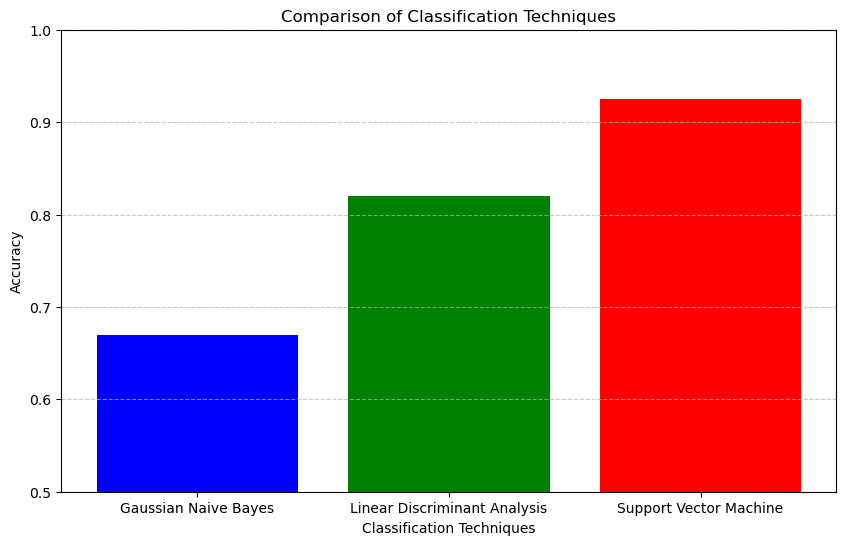

In [50]:
# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Classification Techniques')
plt.ylabel('Accuracy')
plt.title('Comparison of Classification Techniques')
plt.ylim(0.5, 1)  # Set y-axis limit
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

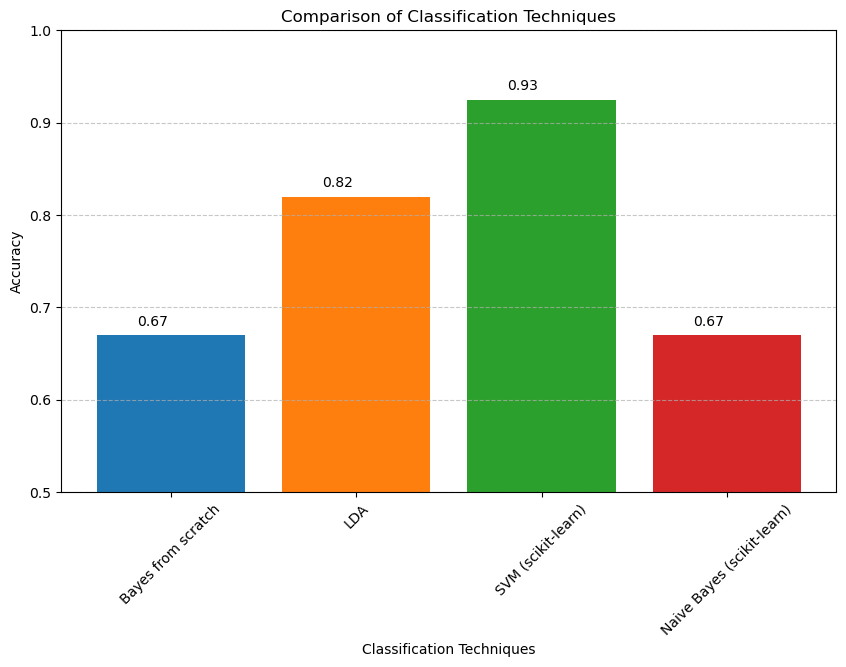

In [52]:
import matplotlib.pyplot as plt

# Define the names of the classifiers
classifiers = ['Bayes from scratch', 'LDA', 'SVM (scikit-learn)', 'Naive Bayes (scikit-learn)']

# Define the accuracies of the classifiers
accuracies = [accuracy, accuracy_lda, accuracy_svm, accuracy_nb]

# Define colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plot the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(classifiers, accuracies, color=colors)
plt.xlabel('Classification Techniques')
plt.ylabel('Accuracy')
plt.title('Comparison of Classification Techniques')
plt.ylim(0.5, 1)  # Set y-axis limit
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add text labels on top of the bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{accuracy:.2f}', ha='center', color='black')

plt.show()
